<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Neural_Networks_Regression_TensorFlow/blob/main/Neural_Networks_Regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network regression problems
For predictions like
* "*How much* will this house sell for?"
* "*How many* people will buy this app?"
* "*How much* will my health insurance be?"
* "*How much* should I save each week for fuel?"

**Note:** The keys are "How much", "How many" (Numbers) <br>
* In image recognition problem, predicting the coordinates of the box/es
* How you think about a problem, defines how you approach

In a nutshell: Trying to figure out relation between dependent variables (Price in case of house example) and independent variables( for example no. of rooms, bathrooms and garages in house example).

 **Usually the output shape of such problem (house pricing) is just 1 that is the predicted price**

🔖It is a type of supervised learning

# The statistics of regression (That I learned in 3rd semester)
* The book that I downloaded for prob. stat. is useful for learning about regression (linear, and multi-variat)

📖Probability & Statistics for Engineers & Scientists NINTH EDITION
 

# What is covered in this notebook (broadly)
* Architecture of a neural network regression model
* Input shapes and output shapes (features and labels, in wikipedia terms, dependent and independent variables)
* Creating custom data to view and fit
* Steps in modelling
 * Creating a model
 * Compiling a model
 * Fitting a model
 * Evaluating a model
* Different evaluation method
* Saving and loading models

# Typical Architecture of neural network regression
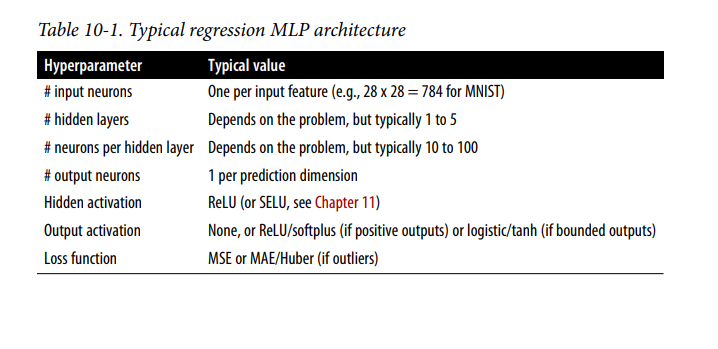

* There is also one missing Hyperparameter "Optimizer: SGD (Stochastic gradient descent)", "Adam"

📖 Hands-On Machine learning with Sckit-Learn, Keras and Tensorflow Page 293

# Introduction to regression with neural networks in TensorFlow
Definition (short): There are many definitions for a regression problem, but in our case, we're going to simplify by saying: predicting a numerical variable based on some other combination of variables.

(Even shorter) : predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


# Step 1) Creating data to view and fit

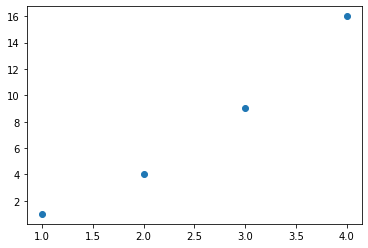

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([[1],[2],[3],[4]]) #Norm is to call it capital x i.e. X
# X conatains no. of bedroom, bathroom, garages respectively in each row

# Create labels
y = np.array([[1],[4],[9],[16]]) # Remember this, we learned from the fundamental ML book about labels and features and saying them X,y
# y constains prices for their respective X (index) ex. [4,3,2] has price 900000

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X*X # We can see this, pretty simple to deduce

# This relation above is the relatio/function between and features and lables
# In wikipedia terms relation between dependent variable (y) and independent variable (X)

array([[ True],
       [ True],
       [ True],
       [ True]])

# Input and Output shapes

In [ ]:
# A demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom","garage"]) # Remember these would be numbers, but for now let it be
house_price = tf.constant([930000]) # It is our 1 shape output or label
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([930000], dtype=int32)>)

In [ ]:
# We need 1 X value to produce 1 y value, that 1 price for 1 house
# You can put all the details/encoding per house into 1 dimension
# For above example we need X[0] to produce y[0]

# X and y are numpy arrays so lets convert them into tensors, and to float32 else model will give error later
# As we have seen, numpy are 64 precison
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X.ndim, y.ndim

(2, 2)

In [ ]:
# Lets check the shapes
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape # It would show 0 because we are using just scalers, 1 value for 1 value

(TensorShape([1]), TensorShape([1]))

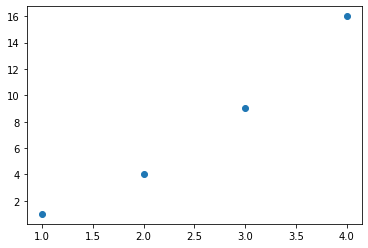

In [ ]:
plt.scatter(X, y)

# Steps in modelling with TensorFlow
1. **Creating a model** -> define the input and output layers, as well as the hideen layers (hidden layers means deep learning) of a deep learning model.
2. **Compiling a model** -> define the loss function ( in other words, the function that tells our model how wrong it is)
 * And the optimizer -> tells our model how to improve the patterns its learning
 * Evaluation metrices -> what we can use to intrepret the performance of our model.
3. **Fitting the model** -> letting the model try to find pattenrs between X and y (features and labels)
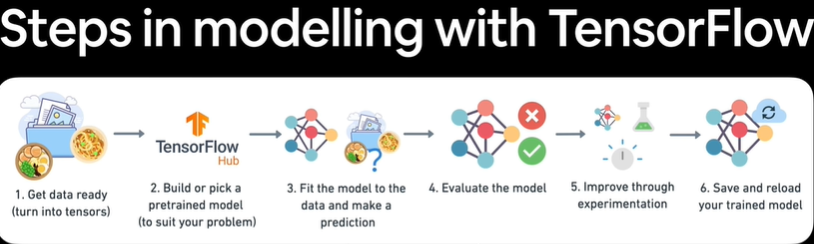

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([ # This will tell tensorflow that I want you to go sequential to the following
      tf.keras.layers.Dense(1) # No. of hidden layers, we just want 1 for this example as we predict 1 no. from 1 no.
]) # model.add(...) is alternative 

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae: Mean Absolute Error (Comparison between predicted vs observerd)
              optimizer = tf.keras.optimizers.SGD(), # SGD(): Stochastic Gradient Descent, telling model how to improve
              metrics=["mae"])
# A lot of functions in tensorflow if have short name we can use it as ="name"
# Example optimizer = "sgd"

# 3. Fitting the model
model.fit(X, y, epochs = 5) # epoches means model will go through X,y for 5 times for the result


Epoch 1/5
1/1 [==============================] - 0s 320ms/step - loss: 6.0749 - mae: 6.0749
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 6.0024 - mae: 6.0024
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 5.9299 - mae: 5.9299
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 5.8574 - mae: 5.8574
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 5.7849 - mae: 5.7849


🔑**Note:** For the above dtype should be tf.float32 because layers dtype precision is by defualt 32, minimum dimensions should be 2

**Explaination of Output:**
1. time in seconds per epoch/lap
2. loss -> how wrong our neural network to predict x and y. It was wrong in beginning, and slowly improved to 7.43 mae from 8.67 -> our evaluation metric, but since we gave it to be same as loss, it will show same result as loss

In [ ]:
# Our model is trained, now lets make a prediction using or model for test number
model.predict([[5.0]]) # since y = X*X, gives given 5 is X value btw, so 5*5 = 25

# model.predict(["some test value/s in X"]), predicts for the test value using trained model
# we trained our model on X,y if you observed


array([[3.5252988]], dtype=float32)

 Well as we see the above output/ prediction is very very wrong

# Improving our model
We can improve our model by making changes in the steps we took to create a model.
1. **Creating a model:** we might add more layers, increse the no. of neurons (hidden units) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model:** here might change the optimization function or the **learning rate** of the optimization function.
3. **Fitting a model:** here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild and try to change number of epochs this time
# 1. Create the model
model = tf.keras.Sequential([
       tf.keras.layers.Dense(1)                      
])

# 2. Compile the model
model.compile (loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mae"])
# Fit the mode (this time we will train for longer)
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 5.8728 - mae: 5.8728
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 5.8003 - mae: 5.8003
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 5.7278 - mae: 5.7278
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 5.6553 - mae: 5.6553
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 5.5828 - mae: 5.5828
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 5.5103 - mae: 5.5103
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 5.4378 - mae: 5.4378
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 5.3653 - mae: 5.3653
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 5.2928 - mae: 5.2928
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 5.2203 - mae: 5.2203
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss

This is improvement, but not so much, it' still a very large difference

In [ ]:
model.predict([[5.0]])

array([[11.689364]], dtype=float32)

Hmm, we see a drastic difference in loss as well as the prediction, but it is still far, it is not 25 as we expected to be 5*5=25

In [ ]:
# Let us try one more change, this time with the optimizer, and leaving epochs 100 as it gave better than at 5 results
# Lets rebuild
# 1. Creating a modelm with layers
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. Compiling the created model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# Fitting the model
model.fit(X, y, epochs = 100)


Epoch 1/100
1/1 [==============================] - 0s 361ms/step - loss: 5.4097 - mae: 5.4097
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 5.4062 - mae: 5.4062
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 5.4027 - mae: 5.4027
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 5.3992 - mae: 5.3992
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 5.3957 - mae: 5.3957
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 5.3922 - mae: 5.3922
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 5.3887 - mae: 5.3887
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 5.3852 - mae: 5.3852
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 5.3817 - mae: 5.3817
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 5.3782 - mae: 5.3782
Epoch 11/100
1/1 [==============================] - 0s 20ms/step - loss: 5.

In [ ]:
# lets try and predict again
model.predict([[5.0]])

array([[4.767105]], dtype=float32)

Hmm, not even close

**Note:** It's not usually the case where changing one hyperparameter will give the best result. But keep going step by step by improving a model with single hyperparameter rather than multiple, because hard to debug

In [ ]:
# Lets try to add more hidden layers with for example 100 neurons and an activation function (ReLu)
# Lets build the model again with the aforementioned change
# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = "relu"), # 100 neurons in this first hidden layer with relu activation
      tf.keras.layers.Dense(1) # our output with 1 neuron, or single output
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), # Lets try with SGD since it gave us better/closer result than just Adam()
              metrics = ["mae"])

# 3. Fitting
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 7.7369 - mae: 7.7369
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5885 - mae: 7.5885
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4406 - mae: 7.4406
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2929 - mae: 7.2929
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1448 - mae: 7.1448
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9960 - mae: 6.9960
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 6.8460 - mae: 6.8460
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 6.6946 - mae: 6.6946
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 6.5415 - mae: 6.5415
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 6.3867 - mae: 6.3867
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 6.23

In [ ]:
# Lets test
model.predict([[5.0]])

array([[14.924879]], dtype=float32)

We can see it is less than what we expect, so, it is underfitting.

**Note:** The loss or mae that we see is not necessarily the output that we would'd see. 

# Common ways to improve a model
1. Add more layers
2. Increase the number of neurons(hidden units)
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate (lr = ) or (learning_rate = ), or just write the learning rate number inside()
6. Fitting on more data
7. Fitting for longer -> we tried this below by increasing epochs value

🔑**Note:** Learning rate is the most important hyperparameter of many different neural networks

In [ ]:
# Lets try by changing activation to none
# 1. Lets rebuild the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = None),
      tf.keras.layers.Dense(1)
])

# 2. Lets compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fitting
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 789ms/step - loss: 7.3683 - mae: 7.3683
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 7.0746 - mae: 7.0746
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 6.7802 - mae: 6.7802
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 6.4841 - mae: 6.4841
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 6.1856 - mae: 6.1856
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 5.8839 - mae: 5.8839
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 5.5780 - mae: 5.5780
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 5.2826 - mae: 5.2826
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 5.0938 - mae: 5.0938
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 4.9020 - mae: 4.9020
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - lo

In [ ]:
# Lets test
model.predict([[5.0]]) # hmm, closer than before

array([[15.711255]], dtype=float32)

In [ ]:
# Now, lets give a learning rate to our SGD(), by default it would be 0.001, but lets make 10% faster and give 0.01
# 1. Build the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = None),
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(lr = 0.1), # 0.1 is better than 0.01
              metrics = ["mae"])

# Fitting the model
model.fit(X, y, epochs = 100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 776ms/step - loss: 7.1775 - mae: 7.1775
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 4.5199 - mae: 4.5199
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 2.8862 - mae: 2.8862
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 2.3026 - mae: 2.3026
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 2.4549 - mae: 2.4549
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 2.1381 - mae: 2.1381
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 2.3547 - mae: 2.3547
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 2.1845 - mae: 2.1845
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 2.0535 - mae: 2.0535
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 2.2370 - mae: 2.2370
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 1.9298 - mae:

In [ ]:
# Lets test
model.predict([[5.0]]) # Our results are improving

array([[17.364101]], dtype=float32)

In [ ]:
# Now, lets try to give Adam, learning rate of 0.01 and activation to None
# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = None),
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.1), # 0.01 gave us 18 while 0.1 is gives us around 21, which closer tjan ever before
              metrics = ["mae"])

# 3. Fitting the model
model.fit(X, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 7.6687 - mae: 7.6687
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 2.5905 - mae: 2.5905
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 7.9291 - mae: 7.9291
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 2.7838 - mae: 2.7838
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 5.9804 - mae: 5.9804
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 7.6395 - mae: 7.6395
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 5.6413 - mae: 5.6413
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 2.4141 - mae: 2.4141
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 2.4159 - mae: 2.4159
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 4.1496 - mae: 4.1496
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss: 3.9423 - m

In [ ]:
# Lets test
model.predict([[5.]])

array([[21.27626]], dtype=float32)

# Evaluating a Model
In practice, a typical workflow you'll go through when building a neural network is:
1. Build a model
2. Compile it
3. Fit it
4. Evaluate it
5. Tweak it (Got to step 3)
6. Fit it
7. Evaluate it
8. Fit it
9. Evaluate it ... ... ...

When it comes to building "Experiment", when it comes to evauluation "Visualise"

It's good to visualise"
* The data: what are working on? what does it look like?
* The model itself: what does our model look like?
* The training: how does a model performs while it learns?
* The prediction: how do the predictions of a model line up against the ground truth (the original labels)

In [ ]:
# Lets make a bigger dataset now
X = tf.range(-100, 100, 4) # Give us X with numbers between -100 to 100 with difference of 3 with each
X = tf.reshape(X,(50,1))
X

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [ ]:
# The labels for our dataset
y = X+10 # This is the pattern/function/formula we want our model to learn
y # This is to create a mock sample, we do not do it in real life, This function is prediction by model. But it for our understanding

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-90],
       [-86],
       [-82],
       [-78],
       [-74],
       [-70],
       [-66],
       [-62],
       [-58],
       [-54],
       [-50],
       [-46],
       [-42],
       [-38],
       [-34],
       [-30],
       [-26],
       [-22],
       [-18],
       [-14],
       [-10],
       [ -6],
       [ -2],
       [  2],
       [  6],
       [ 10],
       [ 14],
       [ 18],
       [ 22],
       [ 26],
       [ 30],
       [ 34],
       [ 38],
       [ 42],
       [ 46],
       [ 50],
       [ 54],
       [ 58],
       [ 62],
       [ 66],
       [ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

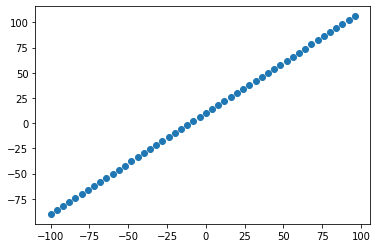

In [ ]:
# Lets visualise the data
plt.scatter(X, y)

# The 3 sets
* **Training set** : The model learns from this data, which is typically 70-80% of the total data available
* **Validation set**: The models gets tune on this data, which is typically 10-15% of the available data
* **Test set**: The model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

**Note:** If you want to get rid of one of them, drop validation set (If not enough or large data or simply small data). **The conept of 3 sets** is possibly one of the most important concept in Machine Learning.

In [ ]:
# Check the length first to use set of 3 concept
len(X)

50

In [ ]:
# 67 is a pretty small set so we will drop the validation set, minimum elements to be called large are a 100+

# Lets split the data to train and test sets
X_train = X[:40] # nearly around 80% of our data, btw X_train is the norm for training set
y_train = y[:40] # same concept for y too

X_test = X[40:] # the remaining for the testing set, nearly 20% of the data
y_test = y[40:] # same concept as above line here too for the labels

# Lets confirm the length of each
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualize the data
Now, we've got our data in training and test sets, lets visualize again

<function matplotlib.pyplot.legend>

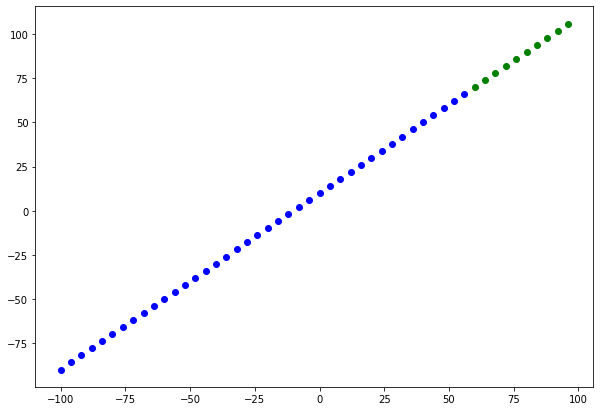

In [ ]:
plt.figure(figsize = (10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")

# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label = "Testing data")

# Show a legend
plt.legend


In [ ]:
# Lets create a neural network and try to train it on 40 and predict the next 10

# 1. Create a model with just 1 layer
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
# model.fit(X_train, y_train, epochs = 100) # Fitting on the training data

# Visualising the model

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-100], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([-90], dtype=int32)>)

In [ ]:
# Lets create a model which builds automatically by defining the input_shape argument in the first layer
# This you would do a lot in practice
# Usually neural nets can figure out input_shape on their own in layer.Dense( )
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1, input_shape = [1]) # 1 input_shape since there is only 1 number as input, if 3 differnt variables then 3 etc.
])

# 2. Lets compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [ ]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


The meaning of above:

dense -> fully connected layers

Output shape -> The shape of the output, in our case we just want 1 number hence (none,1) is correct

* Total Params -> Total number of parameters in the model. (How many patterns it will learn in the relation of X and y
* Trainable parameters -> These are the parameters (patterns) the model can update as it trains.
* Non-trainable params -> These parameters aren't updated during training (this is typically when you bring already learn patterns or parameters from other models during **transfer learning**)

📑 **For more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video**

In [ ]:
# Lets see how it effects the number of total and trainable params when we change hidden units or neuron inside a dense layer
# Lets build the model again for practice
# 1. Creating the model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(3, input_shape=[1]) # Notice we change hidden units to 3 from 1
])

model.summary()  # Lets now see the structure of our neural nets

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


So, the above tells us that there are 6 total parameters,and 6 trainable. Meaning **there are 2 parameters per unit** and the outshape ofcouse changed to 3 because we have just 1 layer with 3 units

In [295]:
# Lets fit our data now, which we commented, lets build again for practice

# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1, input_shape = [1]) # We want to see summary now, so lets provide the input shape, since we have just 1 number per input thus, 1
])

# 2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# 3. Fitting
model.fit(X_train, y_train, epochs = 100, verbose = 0) # by putting verbose = 0, we do not see the model training, by putting 1 we can see
# try to find and research what verbose = 2 does. 0 -> hide, 1 -> show, 2->

In [ ]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Sequential_48 : 48 means we have so far created 48 Sequential model in this notebook. And 80 layers, thus dense_80 = 80

**Note:** When you rerun for multiple times, the epoch also increase meaning 2 runs will have 100+100 epochs output

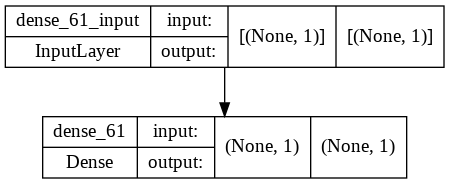

In [ ]:
# We can also visualize using the following
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes = True) # It is very handy to check shapes of input, output and units/layers

In [293]:
# Now lets give name to layers and model so it is easy to analyze. When multi layered neural net would be formed it would come handy
# 1. Lets create the model again for practice
model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, input_shape = [1], name = "Input_layer"), # Hidden layer with 10 nodes/neurons
      tf.keras.layers.Dense(1, name = "Output_layer")
], name = "Practice_model")

# 2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model without watching it traine(verbose = 0)
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [285]:
model.summary() # Watch how our names changed, also do not get confused with every unit should have 2 params (it is not necessary)

Model: "Practice_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


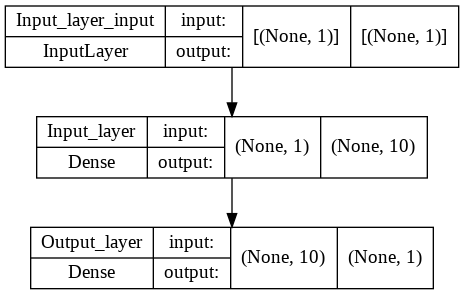

In [286]:
plot_model(model = model, show_shapes = True)

# Visualizing our model's predictions
To visulaize predictions, it's good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true vs y_pred (ground truth vs our model predictions)

In [296]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 74.61132 ],
       [ 79.497246],
       [ 84.38317 ],
       [ 89.26909 ],
       [ 94.15501 ],
       [ 99.04093 ],
       [103.92686 ],
       [108.812775],
       [113.69869 ],
       [118.58462 ]], dtype=float32)

In [280]:
y_test # See if predictions are close to our ground truth, if it could predict 100%, they both would be same

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

🔑**Note:** If you feel that you might need some functionalities going forward in the future, you create a function for it.

In [313]:
# Lets create a plotting function
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = y_pred):
  """ Plots training data, test data and comparison of predictions to ground truth labels """

  plt.figure(figsize = (10,10))

  # Plot training data in blue
  plt.scatter(train_data, train_label, c = "b", label = "Training data")

  # Plot test data in green
  plt.scatter(test_data, test_label, c = "g", label = "Test data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c= "r", label = "Predictions" )

  # Show the legend

  plt.legend()




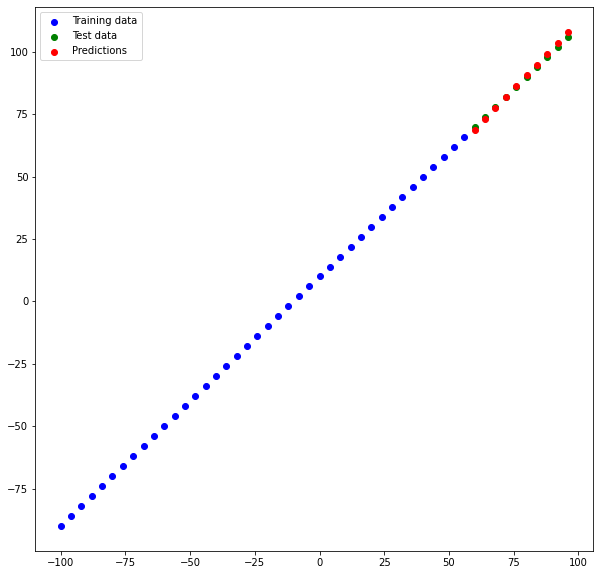

In [314]:
# Lets use the function to plot. Since our parameters are already asssigned no arguments needed
plot_predictions()

# Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression problem, two of the main metrices are:
* **MAE:** Mean absolute error, i.e. on average how wrong is each of our model's prediction.
* **MSE:** Mean square error, i.e. square the average errors

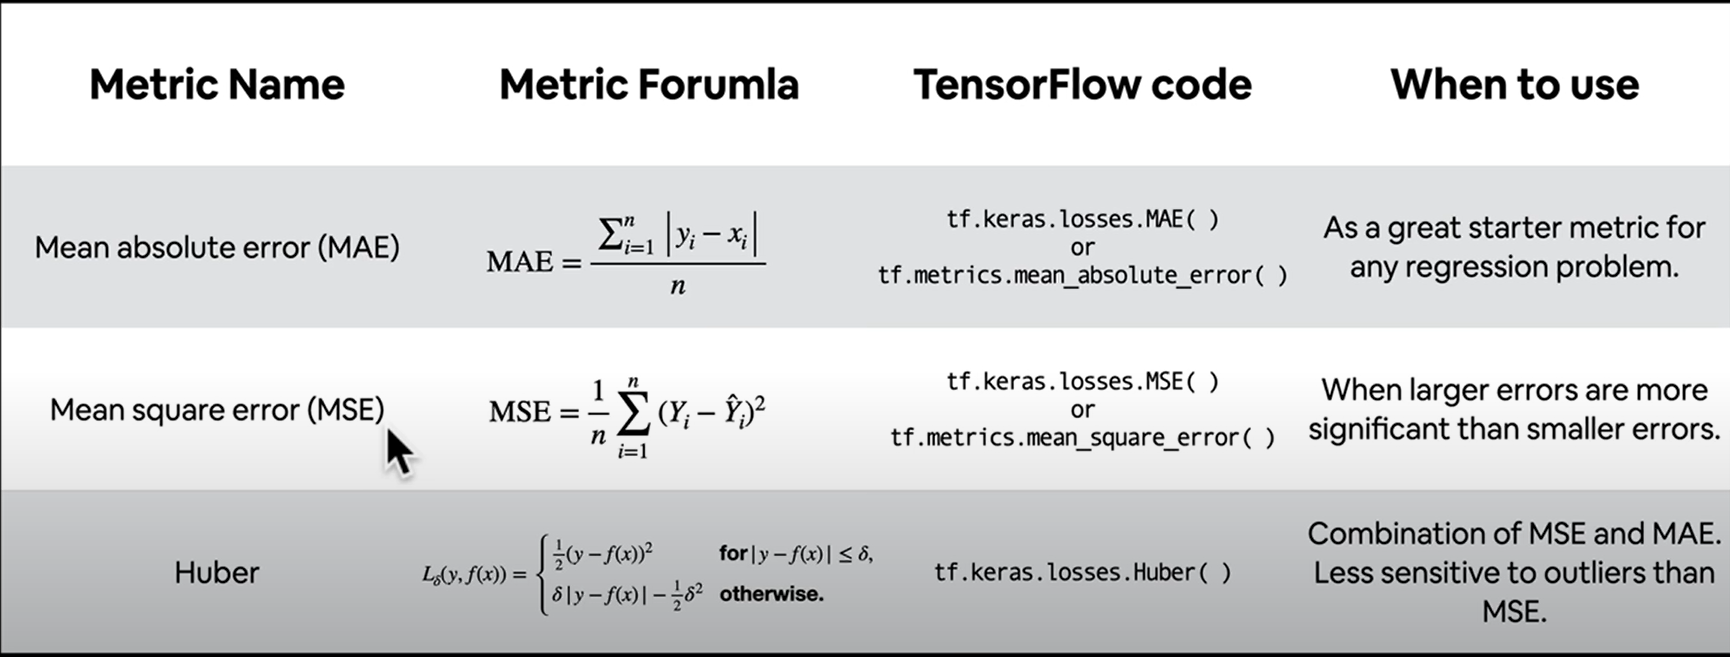

🔑 **Important:** It is mean squared error and not mean square error. The above picture has a mistake.
The syntax would be:
* tf.metrics.mean_squared_error(y_test, y_pred)

In the above picture for MAE, *X*<sub>i</sub> is also the prediction like the Y hat in MSE. Note that this prediction tensor in our code is y_pred




In [315]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 110ms/step - loss: 0.9299 - mae: 0.9299


[0.929852306842804, 0.929852306842804]

The first number is the loss and second is the metric.

Remember, we gave loss = tf.keras.losses.mae, and 

metrics = ["mae"]

Since, both are mae, we get same values for the both, i.e. mae

In [321]:
# Lets calculate mean absolute error using the tensorflow code and compare to see if we get the value same as above
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.1917572 , 0.8377533 , 0.48375702, 0.12975311, 0.22424316,
       0.5782471 , 0.93224335, 1.2862396 , 1.6402359 , 1.9942474 ],
      dtype=float32)>

In [ ]:
# Another way for the same as above
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.929237, 22.867935, 24.806618, 26.745316, 28.684013, 30.622704,
       32.561394, 34.50009 , 36.43878 , 38.377472], dtype=float32)>

In [322]:
y_test - y_pred # We can easily compare these are so close to our mae

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [-1],
       [-1]], dtype=int32)>

In [ ]:
# Mae should be just one number, lest make y_pred a tensor
y_pred = tf.constant(y_pred)
y_pred.shape, y_test.shape

(TensorShape([10, 1]), TensorShape([10, 1]))

In [323]:
# Lets now try again to find the mae
mae = tf.metrics.mean_absolute_error(tf.squeeze(y_test), tf.squeeze(y_pred)) # We need to do it to get rid of the extra 1 dimension,
# since we saw due to that it was given single results for each element in a row
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.9298477>

In [ ]:
# Lets see if it same or very very close to what we got from evaluation
print(model.evaluate(X_test, y_test))
print("\n", tf.metrics.mean_absolute_error(tf.squeeze(y_test), tf.squeeze(y_pred)))

# We can see its almost the same
# Now lets see if both of our mae returns the same value
print("\nResult of both the syntax: ", 
tf.metrics.mean_absolute_error (tf.squeeze(y_test), tf.squeeze(y_pred)) == 
               tf.keras.losses.MAE(tf.squeeze(y_test), tf.squeeze(y_pred)))

1/1 [==============================] - 0s 77ms/step - loss: 29.6534 - mae: 29.6534
[29.653356552124023, 29.653356552124023]

 tf.Tensor(29.653357, shape=(), dtype=float32)

Result of both the syntax:  tf.Tensor(True, shape=(), dtype=bool)


🔑 **Key take away from above:** Since we had an extra 1 dimension it was not possible to consider and sum the difference between predicted and ground truth values. But, after removing the extra dimension they became a single array/tensor with multiple values, hence we were able to take their average. Thus, squeezing comes in handy. We need to make sure about the shapes for getting desired results

# Means squared error
* tf.keras.losses.MSE(y_test, y_pred)
* tf.metrics.mean_squared_error(y_test, y_pred)

Remember to squeeze them to remove the extra dimension, to get the sum. We have not saved the squeezed to original or made a copy so need to perform squeeze again locally if does not have a squeezed tensor already stored

In [ ]:
# Now lets use both the methods together and check if they give us same values, we will also see the value
print(tf.keras.losses.MSE(tf.squeeze(y_test), tf.squeeze(y_pred)))
print("\nIf they are the same: ", 
      tf.keras.losses.MSE(tf.squeeze(y_test), tf.squeeze(y_pred)) ==
      tf.metrics.mean_squared_error(tf.squeeze(y_test), tf.squeeze(y_pred)))

tf.Tensor(910.32947, shape=(), dtype=float32)

If they are the same:  tf.Tensor(True, shape=(), dtype=bool)


When larger errors are worse, meaning being 100 off is very very worse than being 10, then use MSE,
typically used for larger errors

# Huber
It is somewhat a mid of MSE and MAE, but, lets try it out
* tf.keras.losses.huber(y_test, y_pred)

In [ ]:
tf.keras.losses.huber(tf.squeeze(y_test), tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=29.153357>

In [ ]:
# Now, lets make some funcions to reuse these functions for future going forward
def mean_absolute_error(label_test, label_pred):
  print("Mean absolute error: ")  # We could use return, but for now its okay, we just want to see it clearly
  print(tf.keras.losses.MAE(label_test, label_pred).numpy()) # Assuming that you pass a squeezed shape tensors

def mean_squared_error(label_test, label_pred):
  print("\nMean squared error: ")
  print(tf.keras.losses.MSE(label_test, label_pred).numpy())

def huber(label_test, label_pred):
  print("\nHuber: ")
  print(tf.keras.losses.huber(label_test, label_pred).numpy())

In [ ]:
# Lets test our functions out
mean_absolute_error(tf.squeeze(y_test), tf.squeeze(y_pred)),
mean_squared_error(tf.squeeze(y_test), tf.squeeze(y_pred)),
huber(tf.squeeze(y_test), tf.squeeze(y_pred))

Mean absolute error: 
29.653357

Mean squared error: 
910.32947

Huber: 
29.153357


# Running experiments to improve our model
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it
-> fit it -> evaluate it -> tweak it..... and so on 


Machine learning explorer motto "Visualise" the following as often as possible

* Data
* Model
* Training (Will see this ahead)
* Predictions

Machine Learning practisioner motto "Experiment"
* Experiment and tune hyperparameters to get the best results

🤓 And we are both


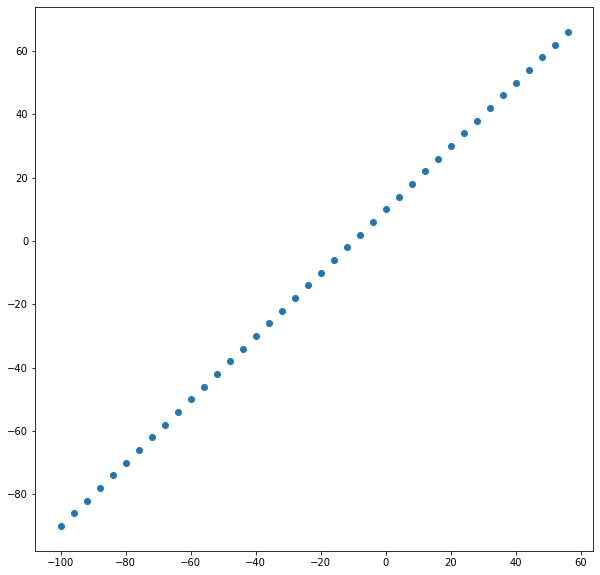

In [ ]:
# Lets visualize our data first, as a step 1
plt.figure(figsize = (10,10))
plt.scatter(X_train, y_train)

In [305]:
# Lets Experiment and build our model again to see if we can improve it, building it again for practice

# 1. Creating the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation = None, input_shape = [1], name = "Input_layer"), # with 10 neuron hidden layer
      tf.keras.layers.Dense(1, activation = None, name = "Output_layer")
], name = "Improved_model")

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), # We change the optimizer to Adam and test
              metrics = ["mae"])

# 3. Fitting the model
model.fit(X_test, y_test, epochs = 100, verbose = 0)

In [ ]:
# Lets visualize our model now
model.summary()

Model: "Improved_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


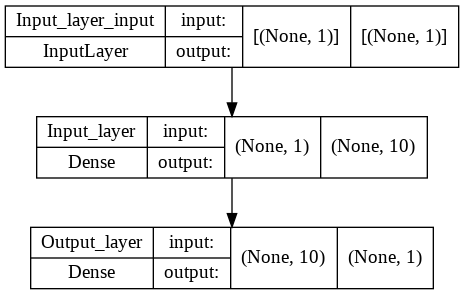

In [300]:
# Visualizing model
plot_model(model = model, show_shapes = True)

In [325]:
# Now lets predict values of our test data
y_pred = model.predict(X_test)
y_pred

array([[ 68.80824 ],
       [ 73.16225 ],
       [ 77.51624 ],
       [ 81.87025 ],
       [ 86.22424 ],
       [ 90.57825 ],
       [ 94.93224 ],
       [ 99.28624 ],
       [103.640236],
       [107.99425 ]], dtype=float32)

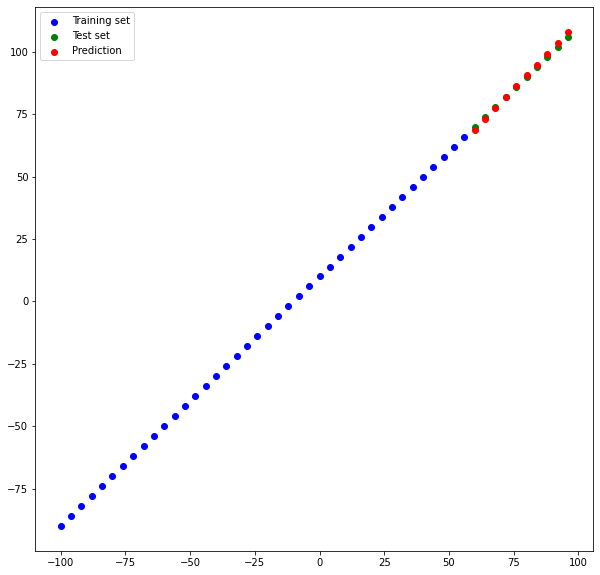

In [326]:
# Lets visualise this predictions to see
plt.figure(figsize = (10,10))

# Plot between X_test and y_test, that is actual values in green color
plt.scatter(X_train, y_train, c="b", label = "Training set")

# Plot between X_train and y_train in blue
plt.scatter(X_test, y_test, c="g", label = "Test set")

# Plot between X_train and y_predictions in red
plt.scatter(X_test, y_pred, c="r", label = "Prediction")

# Legend
plt.legend()

In [327]:
# Wow, this is so imporved, but lets evaluate it
model.evaluate(X_test, y_test) # This means that we want to evaluate the model by comparing to our test set

1/1 [==============================] - 0s 22ms/step - loss: 0.9299 - mae: 0.9299


[0.929852306842804, 0.929852306842804]

In [328]:
# Now lets check using the functions we already defined
mean_absolute_error(tf.squeeze(y_test), tf.squeeze(y_pred)) # Output is same as evlaute

# Btw I know we had a function to visualize data with predictions, but for practice

Mean absolute error: 
0.9298477


# Running experiments to improve steps reminder:
1. **Get more data:** get more examples for your model to train on (more opportunities to learn patterns or relationships b/w features and labels)
2. **Make your model lager:** Using a more complex model (this might come in the form of more layers or more hidden units/neurons in each layer
3. **Train for longer:** Give your model more chance to find patterns in a data

We cannot do 1, since we cannot create artifical or fake data.

Let's do 3 modelling experiments:
1. model_1 : same as original model, 1 layer, trained for 100 epochs
2. model_2: 2 layers, trained for 100 epochs
3. model_3: 2 layers, trained for 500 epochs
4. Change optimizer's learning_rate
5. Change optimizer
6. Change learning_rate for this too

# Model_2

In [463]:
# We already did 1, 5 and 6 so lets start with number 2
tf.random.set_seed(42) # random seed for reproducibility

# 1. Create the model_2 with aforementioned tuning
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = None, input_shape = [1], name = "Input_layer"),
      tf.keras.layers.Dense(1, activation = None, name = "Output_layer")
], name = "model_2")

# 2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# 3. Fitting 
model.fit(X_train, y_train, epochs = 100, verbose = 0)


In [330]:
# Lets view the summary
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               200       
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


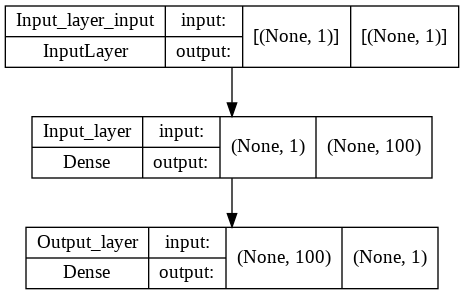

In [332]:
# Lets visualize the model
plot_model(model = model, show_shapes = True)

In [464]:
# Lets predict now
y_pred = model.predict(X_test)
y_pred

array([[ 76.422066],
       [ 81.40026 ],
       [ 86.378456],
       [ 91.35665 ],
       [ 96.334854],
       [101.31305 ],
       [106.29124 ],
       [111.26945 ],
       [116.247635],
       [121.22584 ]], dtype=float32)

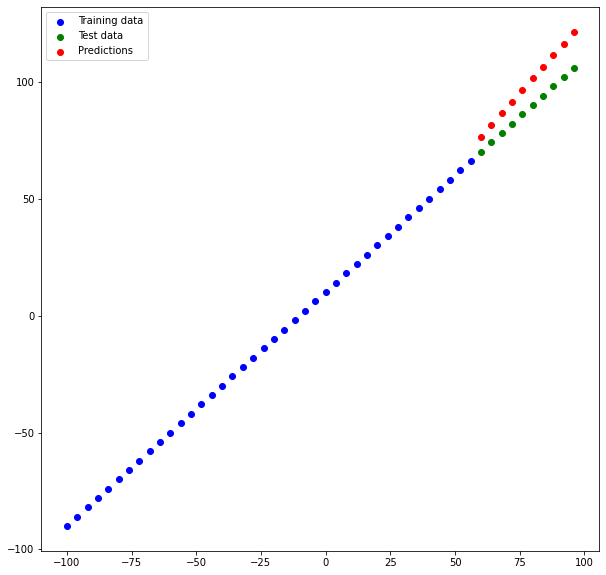

In [349]:
# Lets visualize this using our function now
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [466]:
# Lets find the mae for this
# model.evaluate(X_test, y_test), 
mae_2 = mean_absolute_error(tf.squeeze(y_test), tf.squeeze(y_pred))

Mean absolute error: 
10.82395


Well the above result is onbviosly not goof enough

In [ ]:
# Now lets try Model 3

# Model_3

In [350]:
# Now lets try model_3 tuning
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation = None, input_shape = [1], name = "input_layer"), # we gave 10 neurons because 100 was overfitting in above model
      tf.keras.layers.Dense(1, activation = None, name = "output_layer")
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fitting
model.fit(X_train, y_train, epochs = 500, verbose = 0)

In [341]:
# Lets see the model summary
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


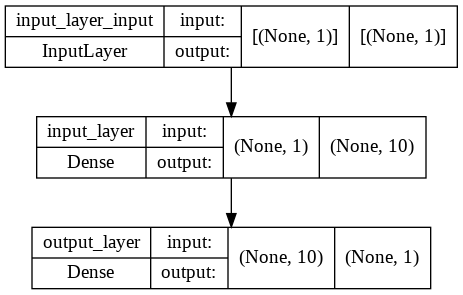

In [342]:
# Lets visualize model
plot_model(model = model, show_shapes = True)

In [351]:
# Lets make predictions for the test sample
y_pred = model.predict(X_test)
y_pred

array([[15.854742],
       [16.617329],
       [17.379915],
       [18.142504],
       [18.905092],
       [19.667677],
       [20.430264],
       [21.192854],
       [21.95544 ],
       [22.718027]], dtype=float32)

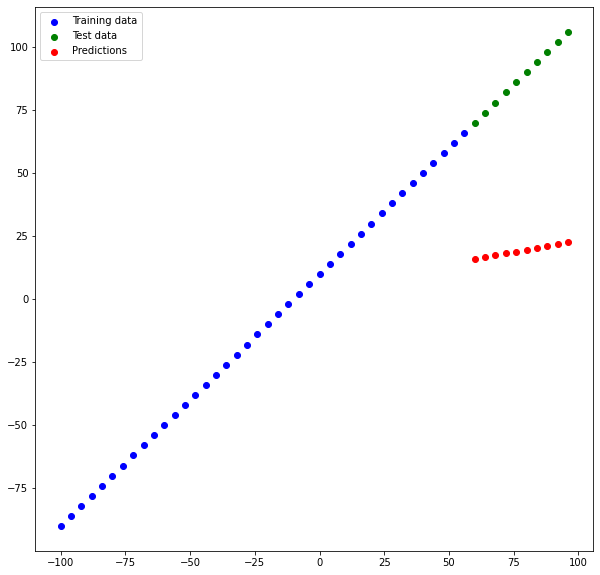

In [352]:
# Lets visualize it
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

Well this is the worst so far, very very underfitting. But we saw above, the model with Adam optimizer with learning rate 0.1 and 100 epochs is the best, but lets try the same with 100 neurons next



# Model_5

In [475]:
# Lets try Adam optimizer with learnin_rate = 0.1 and 100 neurons in the hidden layer
tf.random.set_seed(42)
# 1. Lets create the model
model_best = tf.keras.Sequential([
      tf.keras.layers.Dense(7, activation = None, input_shape = [1]), # 100 neurons is very overfitting
      tf.keras.layers.Dense(1, activation = None)
], name = "model_5")

# 2. Compile
model_best.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# Fitting the model
model_best.fit(X_train, y_train, epochs = 100, verbose = 0)

In [476]:
# Lets predict
y_pred = model_best.predict(X_test)
y_pred

array([[ 70.110275],
       [ 74.097725],
       [ 78.085175],
       [ 82.072624],
       [ 86.060074],
       [ 90.04752 ],
       [ 94.034966],
       [ 98.022415],
       [102.009865],
       [105.997314]], dtype=float32)

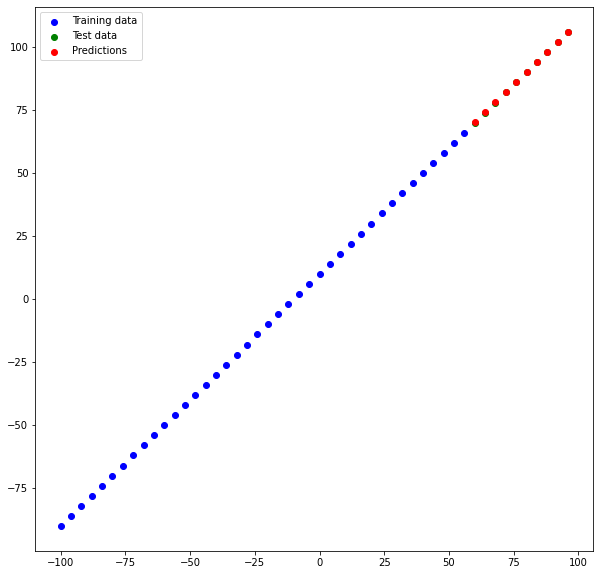

In [477]:
# Lets visualize our predictions against to see
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [478]:
# lets evaluate to see
model_best.evaluate(X_test, y_test)

1/1 [==============================] - 0s 120ms/step - loss: 0.0543 - mae: 0.0543


[0.0543365478515625, 0.0543365478515625]

In [479]:
# Lets check if mae coincides with our above results of evaluation
mae_3 = mean_absolute_error(tf.squeeze(y_test), tf.squeeze(y_pred))  # It does

Mean absolute error: 
0.054332733


✔ **Conclusion:** Our above model, model_5 is the best model so far. We tuned hyperparameters by testing them. We incresed number of neurons to 100 and it was very overfitting then 10. Thus, we tried to reduce neurons from earlier, i.e. 10 then we saw that 7 gave the best results so far, I mean just see the beautiful plot. And the evluation/mae is just 0.05 which is really good accuracy.

# Comparing the results of our experiments
We have run few experiments, now lets see how to compare them

In [473]:
# We can compare our model's results using a pandas DataFrame
# import pandas as pd
#model_results = [["model_2", mae_2],
 #                ["model_5", mae_3]]
#all_results = pd.DataFrame(model_results, columns = ["model", "mae"])
# all_results

# Tracking experiment results
A good habits is to keep track of the tunes and the results.

When doing it could be tedious if we are running lots of experiments

Fortunately there are tools for us to get help 

📑 As we build more models, we will want to look into using:
* TensorBoard: A component of the TensorFlow library to help track modelling experiments (We'll see later)
* Weights and Biases: A tool for tracking all kinds of ML experiments (plugs straight into tensor board)

# Saving our models
Saving our models allows us to use them outside of Google Colab ( or wherever they were trained, such as a web application, desktop or mobile apps)

There are 2 main formats we can save our model to:
1. The SavedModel format
2. The HDF5 format

In [481]:
# Save model using the SavedModel Format
model_best.save("Best_Model_SavedModel_Format") # If you are going to use in tensorflow, you use this

INFO:tensorflow:Assets written to: Best_Model_SavedModel_Format/assets


In [482]:
# Save model using HDF5 format
model_best.save("best_model_HDF5.h5") # If you are goingt to use somewhere else this must be useful

# Loading in a saved model
For both the types of saving methods, loading code is the same:

* tf.keras.models.load_model("path of the file/folder")

In [483]:
# Load in the SavedModel format model
load_savedmodel = tf.keras.models.load_model("/content/Best_Model_SavedModel_Format")
load_savedmodel.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_139 (Dense)           (None, 7)                 14        
                                                                 
 dense_140 (Dense)           (None, 1)                 8         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [484]:
model_best.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_139 (Dense)           (None, 7)                 14        
                                                                 
 dense_140 (Dense)           (None, 1)                 8         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


Summary is the same

In [486]:
# Now lets compare the predictions of both the models to check if loaded model and saved model are the same
model_best.predict(X_test) == load_savedmodel.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [487]:
# Now, lets load h5 model and laod
load_h5 = tf.keras.models.load_model("/content/best_model_HDF5.h5")
load_h5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_139 (Dense)           (None, 7)                 14        
                                                                 
 dense_140 (Dense)           (None, 1)                 8         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [488]:
# Now lets check the predictions
model_best.predict(X_test) == load_h5.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download a model (or any other file) from google colab
1. Go to files tab -> right click the file you are after -> download
2. Use code in the below cell
3. Save it to google drive by connecting to drive and copying it there

In [ ]:
# Download a file from google colab using code
from google.colab import files
files.download("path of the file") # right click on the file to copy the path, but if you have to right click, just download using 1

In [ ]:
# Save a file from colab to google drive
!cp file_path drive_path_where_to_store